In [1]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import sys

Using TensorFlow backend.


In [2]:
# convert the model from .json file and apply the weight from HDF5 into it
def loadModel():
    try:
        json = open("cifar100_model.json", "r")
        model_json = json.read()
        json.close()
        model = model_from_json(model_json)
        model.load_weights("cifar100_model.h5")
        return model
    except FileNotFoundError:
        print("No saved models yet! Please create a new network.")
        sys.exit()

# Function for numbers == categories
def categoryName(n):
    categories = [
        "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle",
        "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel",
        "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock",
        "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
        "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
        "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion",
        "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse",
        "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
        "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
        "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose",
        "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
        "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table",
        "tank", "telephone", "television", "tiger", "tractor", "train", "trout",
        "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman",
        "worm"
    ]
    return categories[n]

# Visualize a small preview of evaluated predictions and their true values in Jupyter notebook or similiar app
def preview(model, img_dimensions, index):
    # @require index <= len(x_test) - 11
    x_train, y_train, x_test, y_test = prepareData()
    fig = plt.figure(figsize=(50, 50))
    for i in range(0, 10):
        image_index = index + i
        sub = fig.add_subplot(10, 1, i + 1)
        pred = model.predict(x_test[image_index].reshape(1, img_dimensions, img_dimensions, 3))
        title = "Subject of the picture is probadly " + categoryName(pred.argmax())
        sub.set_title(title)
        sub.imshow(x_test[image_index].reshape(img_dimensions, img_dimensions, 3), interpolation='nearest')

In [4]:
def prepareData():
        # Load the data and allocate it into correct matrices.
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
        categories = 100

        # Ensuring that the values are in 32 decimal float
        x_train = x_train.astype("float32")
        x_test = x_test.astype("float32")

        # Z-score normalization
        mean = np.mean(x_train)
        std = np.std(x_train)
        x_train = (x_train - mean) / (std + 1e-7)
        x_test = (x_test - mean) / (std + 1e-7)

        # Allocate validation data into categories to be used with crossentropy
        y_train = np_utils.to_categorical(y_train, categories)
        y_test = np_utils.to_categorical(y_test, categories)

        return (x_train, y_train, x_test, y_test)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

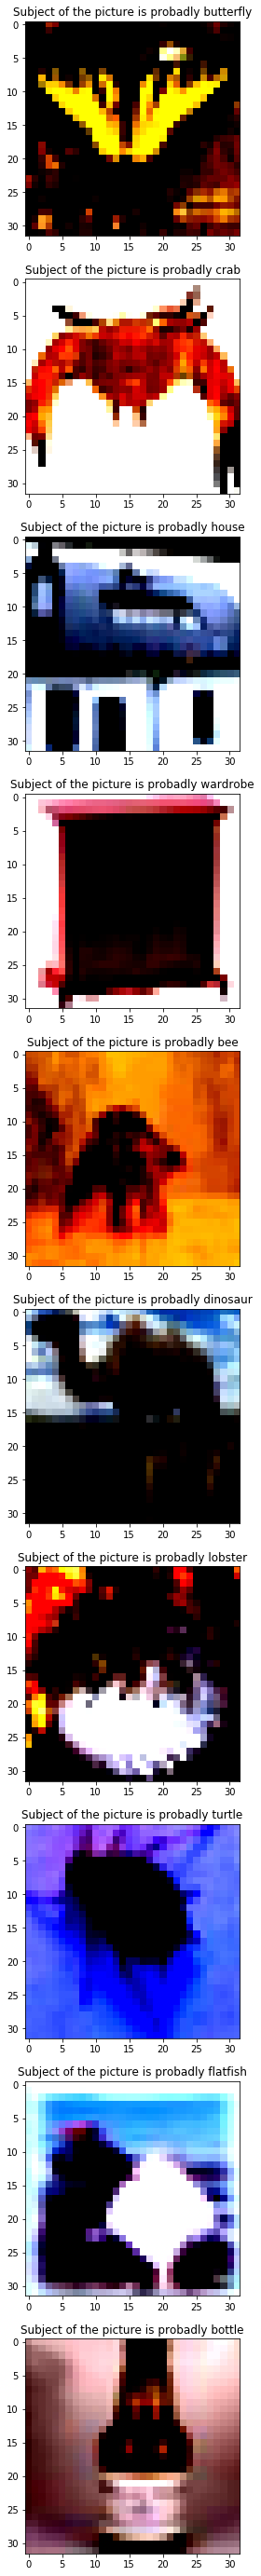

In [7]:
model = loadModel()
preview(model, 32, 1505)